# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [7]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [13]:
# Criar as faixas de Latitude
sinasc_raw['LatFaixa'] = np.where(sinasc_raw['munResLat'] > -10.5, 'Acima_de_-10.5', 'Abaixo_de_-10.5')

# Agrupar os dados pelas faixas de Latitude e calcular as operações estatísticas
grouped = sinasc_raw.groupby('LatFaixa').agg({
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibir os resultados
print(grouped)

                   APGAR1                                                  \
                      sum      mean  min   max median       std       var   
LatFaixa                                                                    
Abaixo_de_-10.5  104599.0  8.070288  0.0  10.0    8.0  0.960765  0.923069   
Acima_de_-10.5   114559.0  8.199771  0.0  10.0    8.0  1.002839  1.005686   

                     PESO                                              \
                      sum         mean  min   max  median         std   
LatFaixa                                                                
Abaixo_de_-10.5  42101809  3240.096121  258  5985  3270.0  531.794694   
Acima_de_-10.5   45555148  3246.055864  295  5190  3275.0  556.487709   

                                
                           var  
LatFaixa                        
Abaixo_de_-10.5  282805.596163  
Acima_de_-10.5   309678.570242  


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [15]:
# Criar as faixas de Área dos Municípios
sinasc_raw['AreaFaixa'] = np.where(sinasc_raw['munResArea'] > 3000, 'Acima_de_3000', 'Abaixo_de_3000')

# Agrupar os dados pelas faixas de Área e calcular as operações estatísticas
grouped_area = sinasc_raw.groupby('AreaFaixa').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibir os resultados
print(grouped_area)

               IDADEMAE                                                 \
                    sum       mean min max median       std        var   
AreaFaixa                                                                
Abaixo_de_3000   137413  26.324330  11  53   26.0  6.305013  39.753192   
Acima_de_3000    567848  26.038518  12  53   25.0  6.405497  41.030387   

               QTDFILVIVO                                                  
                      sum      mean  min   max median       std       var  
AreaFaixa                                                                  
Abaixo_de_3000     4774.0  0.924298  0.0  30.0    1.0  1.075338  1.156352  
Acima_de_3000     22053.0  1.086890  0.0  14.0    1.0  1.191750  1.420268  


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [19]:
# Criar as faixas de Altitude dos Municípios
bins = [-np.inf, 100, 500, np.inf]
labels = ['Abaixo_de_100', 'Entre_100_e_500', 'Acima_de_500']
sinasc_raw['AltFaixa'] = pd.cut(sinasc_raw['munResAlt'], bins=bins, labels=labels)

# Agrupar os dados pelas faixas de Altitude e calcular as operações estatísticas
grouped_alt = sinasc_raw.groupby('AltFaixa', observed=False).agg({
    'CONSULTAS': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibir os resultados
print(grouped_alt)

                CONSULTAS                                               \
                      sum      mean min max median       std       var   
AltFaixa                                                                 
Abaixo_de_100       29684  3.341664   1   9    4.0  0.981709  0.963753   
Entre_100_e_500     60974  3.683339   1   9    4.0  0.643293  0.413826   
Acima_de_500         6004  3.776101   1   9    4.0  0.636765  0.405470   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
AltFaixa                                                                    
Abaixo_de_100       6128.0  0.804833  0.0  40.0    0.0  1.382272  1.910677  
Entre_100_e_500     7921.0  0.496646  0.0  41.0    0.0  1.133907  1.285746  
Acima_de_500         522.0  0.329338  0.0   9.0    0.0  0.840907  0.707125  


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [21]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

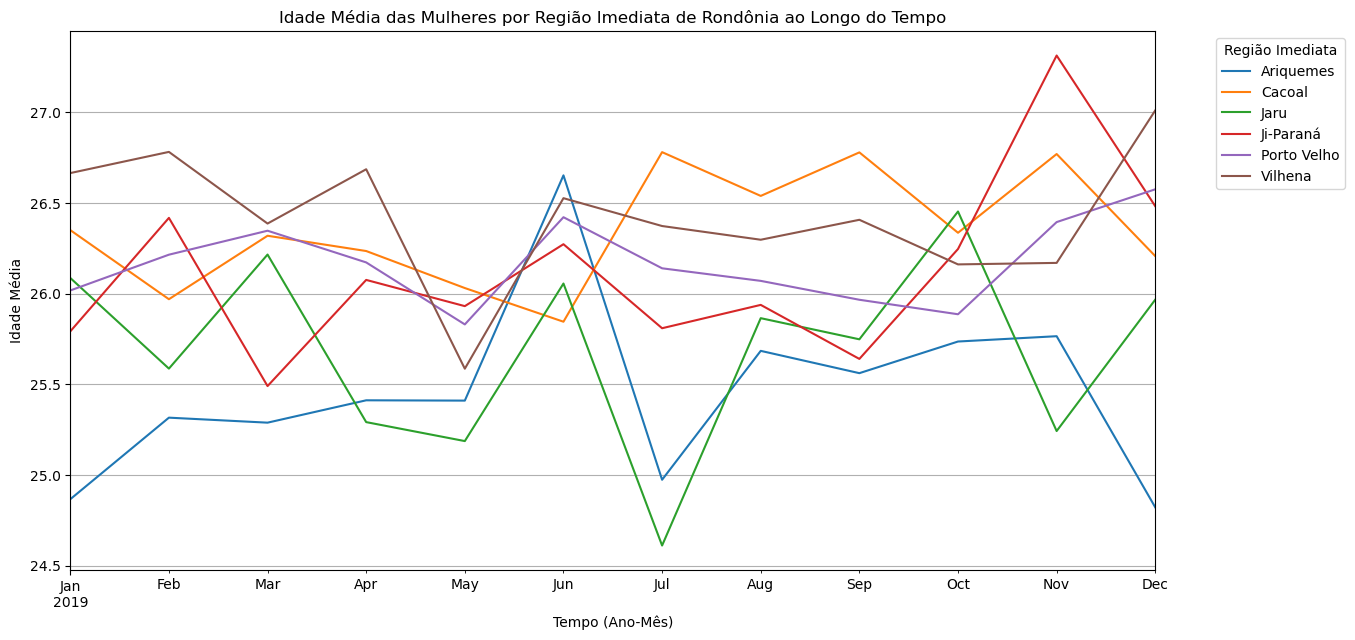

In [23]:
# Adicionar coluna com a região imediata correspondente ao município de residência
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter a coluna de data de nascimento para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

# Adicionar uma coluna para o ano e mês
sinasc_raw['AnoMes'] = sinasc_raw['DTNASC'].dt.to_period('M')

# Calcular a idade média das mulheres por região imediata e por mês
idade_media_por_regiao = sinasc_raw.groupby(['AnoMes', 'RegiaoImediata'])['IDADEMAE'].mean().unstack()

# Plotar os dados
idade_media_por_regiao.plot(figsize=(14, 7))
plt.title('Idade Média das Mulheres por Região Imediata de Rondônia ao Longo do Tempo')
plt.xlabel('Tempo (Ano-Mês)')
plt.ylabel('Idade Média')
plt.legend(title='Região Imediata', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [47]:
# Carregar os dados
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')

# Dados do IDH
idh_data = {
    "Município": ["Porto Velho", "Vilhena", "Cacoal", "Ji-Paraná", "Pimenta Bueno", "Ariquemes", "Rolim de Moura",
                  "Cerejeiras", "Jaru", "Colorado do Oeste", "Ouro Preto do Oeste", "Espigão d'Oeste", "Santa Luzia d'Oeste",
                  "Pimenteiras do Oeste", "Presidente Médici", "Castanheiras", "Guajará-Mirim", "Chupinguaia", "Cabixi",
                  "Candeias do Jamari", "São Felipe d'Oeste", "Cacaulândia", "São Miguel do Guaporé", "Mirante da Serra",
                  "Alvorada d'Oeste", "Teixeirópolis", "Nova Brasilândia d'Oeste", "Rio Crespo", "Primavera de Rondônia",
                  "Alta Floresta d'Oeste", "Ministro Andreazza", "Novo Horizonte do Oeste", "Vale do Paraíso", "Alto Paraíso",
                  "Parecis", "Buritis", "Itapuã do Oeste", "Corumbiara", "Cujubim", "Costa Marques", "São Francisco do Guaporé",
                  "Urupá", "Monte Negro", "Seringueiras", "Governador Jorge Teixeira", "Machadinho d'Oeste", "Campo Novo de Rondônia",
                  "Alto Alegre dos Parecis", "Theobroma", "Nova União", "Nova Mamoré", "Vale do Anari"],
    "IDH": [0.736, 0.731, 0.718, 0.714, 0.710, 0.702, 0.700, 0.692, 0.689, 0.685, 0.682, 0.672, 0.670, 0.665, 0.664,
            0.658, 0.657, 0.652, 0.650, 0.649, 0.649, 0.646, 0.646, 0.643, 0.643, 0.643, 0.643, 0.643, 0.641, 0.641,
            0.638, 0.634, 0.627, 0.625, 0.617, 0.616, 0.614, 0.613, 0.612, 0.611, 0.611, 0.609, 0.607, 0.598, 0.596,
            0.596, 0.593, 0.592, 0.589, 0.587, 0.587, 0.584]
}

idh_df = pd.DataFrame(idh_data)

# Renomear colunas no sinasc_raw para evitar conflitos
sinasc_raw.rename(columns={'munResNome': 'Municipio'}, inplace=True)

# Adicionar os dados do IDH ao dataframe sinasc_raw
sinasc_raw = sinasc_raw.merge(idh_df, left_on='Municipio', right_on='Município', how='left')

# Verificar se a coluna 'IDH' foi adicionada corretamente
if 'IDH' not in sinasc_raw.columns:
    print("A coluna 'IDH' não foi encontrada no dataframe sinasc_raw.")
else:
    print("A coluna 'IDH' foi adicionada com sucesso.")

# Criar faixas com base nos valores do IDH
bins = [0.0, 0.6, 0.7, 0.8]
labels = ['Baixo', 'Médio', 'Alto']
sinasc_raw['IDH_Faixa'] = pd.cut(sinasc_raw['IDH'], bins=bins, labels=labels, include_lowest=True)

# Agrupar e calcular estatísticas para duas variáveis numéricas
grouped_idh = sinasc_raw.groupby('IDH_Faixa', observed=False).agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibir resultados
print(grouped_idh)

A coluna 'IDH' foi adicionada com sucesso.
               PESO                                              \
                sum         mean  min   max  median         std   
IDH_Faixa                                                         
Baixo       4301955  3244.309955  730  4785  3255.0  514.083790   
Médio      25415716  3243.041470  258  5720  3270.0  527.700671   
Alto       51716855  3246.914553  292  5480  3275.0  554.013292   

                            APGAR1                                        \
                     var       sum      mean  min   max median       std   
IDH_Faixa                                                                  
Baixo      264282.143101   10747.0  8.110943  0.0  10.0    8.0  0.945130   
Médio      278467.998152   63419.0  8.124391  0.0  10.0    8.0  0.999309   
Alto       306930.728242  129774.0  8.177316  0.0  10.0    8.0  0.960530   

                     
                var  
IDH_Faixa            
Baixo      0.893271  
Médio    

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [68]:
# Dados do IFDM
ifdm_data = {
    "Município": ["Ariquemes", "Vilhena", "Pimenta Bueno", "Porto Velho", "Ji-Paraná", "Cacoal",
                  "Santa Luzia d'Oeste", "Rolim de Moura", "Chupinguaia", "São Miguel do Guaporé",
                  "Pimenteiras do Oeste", "Teixeirópolis", "Colorado do Oeste", "Jaru", "Rio Crespo",
                  "Primavera de Rondônia", "Alta Floresta d'Oeste", "Ouro Preto do Oeste",
                  "São Francisco do Guaporé", "Candeias do Jamari", "São Felipe d'Oeste",
                  "Presidente Médici", "Cerejeiras", "Monte Negro", "Urupá", "Espigão d'Oeste",
                  "Seringueiras", "Alvorada d'Oeste", "Itapuã do Oeste", "Cabixi", "Novo Horizonte do Oeste",
                  "Nova Brasilândia d'Oeste", "Vale do Paraíso", "Corumbiara", "Alto Paraíso",
                  "Cacaulândia", "Vale do Anari", "Ministro Andreazza", "Costa Marques", "Nova União",
                  "Guajará-Mirim", "Mirante da Serra", "Parecis", "Castanheiras", "Theobroma",
                  "Machadinho d'Oeste", "Campo Novo de Rondônia", "Nova Mamoré", "Cujubim",
                  "Alto Alegre dos Parecis", "Governador Jorge Teixeira"],
    "IFDM": [0.7746, 0.7465, 0.7383, 0.7257, 0.7117, 0.7111, 0.6850, 0.6785, 0.6766, 0.6699,
             0.6501, 0.6500, 0.6473, 0.6450, 0.6430, 0.6384, 0.6337, 0.6261, 0.6214, 0.6199,
             0.6153, 0.6140, 0.6137, 0.6016, 0.6006, 0.5973, 0.5922, 0.5919, 0.5903, 0.5887,
             0.5858, 0.5857, 0.5818, 0.5759, 0.5735, 0.5721, 0.5710, 0.5657, 0.5626, 0.5571,
             0.5541, 0.5519, 0.5502, 0.5430, 0.5405, 0.5322, 0.5272, 0.5084, 0.5055, 0.5046,
             0.4562]
}

ifdm_df = pd.DataFrame(ifdm_data)

# Renomear coluna no DataFrame sinasc_raw para evitar conflitos
sinasc_raw.rename(columns={'munResNome': 'Municipio'}, inplace=True)

# Realizar o merge com sufixos para evitar conflitos de nomes
sinasc_raw = sinasc_raw.merge(ifdm_df, left_on='Municipio', right_on='Município', how='left', suffixes=('', '_ifdm'))

# Remover colunas duplicadas após o merge
sinasc_raw = sinasc_raw.loc[:, ~sinasc_raw.columns.duplicated()]

# Criar faixas de desenvolvimento com base no IFDM
bins_ifdm = [0, 0.4, 0.6, 0.8, 1.0]
labels_ifdm = ['Baixo', 'Regular', 'Moderado', 'Alto']
sinasc_raw['IFDM_Faixa'] = pd.cut(sinasc_raw['IFDM'], bins=bins_ifdm, labels=labels_ifdm, include_lowest=True)

# Agrupar e calcular estatísticas para duas variáveis numéricas
grouped_ifdm = sinasc_raw.groupby('IFDM_Faixa', observed=False).agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Exibir resultados
print(grouped_ifdm)

                PESO                                                  \
                 sum         mean    min     max  median         std   
IFDM_Faixa                                                             
Baixo              0          NaN    NaN     NaN     NaN         NaN   
Regular     11929710  3255.036835  425.0  5070.0  3275.0  519.001837   
Moderado    67621798  3244.340930  258.0  5720.0  3275.0  548.918570   
Alto               0          NaN    NaN     NaN     NaN         NaN   

                             APGAR1                                        \
                      var       sum      mean  min   max median       std   
IFDM_Faixa                                                                  
Baixo                 NaN       0.0       NaN  NaN   NaN    NaN       NaN   
Regular     269362.906667   29568.0  8.105263  0.0  10.0    8.0  0.993201   
Moderado    301311.596169  169400.0  8.155994  0.0  10.0    8.0  0.963501   
Alto                  NaN       0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [84]:
# Dados ajustados
pib_data = {
    'Município': [
        'Porto Velho', 'Ji-Paraná', 'Vilhena', 'Ariquemes', 'Cacoal', 'Jaru', 'Rolim de Moura', 'Pimenta Bueno',
        'Guajará-Mirim', 'Ouro Preto do Oeste', 'Buritis', 'Machadinho do Oeste', 'Espigão d\'Oeste', 'São Miguel do Guaporé',
        'Candeias do Jamari', 'Nova Mamoré', 'Cerejeiras', 'Alta Floresta do Oeste', 'Presidente Médici', 'Cujubim',
        'Nova Brasilândia do Oeste', 'Alto Paraíso', 'São Francisco do Guaporé', 'Colorado do Oeste', 'Monte Negro',
        'Alto Alegre dos Parecis', 'Campo Novo de Rondônia', 'Alvorada do Oeste', 'Chupinguaia', 'Corumbiara',
        'Ministro Andreazza', 'Urupá', 'Costa Marques', 'Seringueiras', 'Mirante da Serra', 'Governador Jorge Teixeira',
        'Theobroma', 'Santa Luzia do Oeste', 'Novo Horizonte do Oeste', 'Itapuã do Oeste', 'Vale do Paraíso', 'Cacaulândia',
        'Cabixi', 'Vale do Anari', 'Nova União', 'Parecis', 'Rio Crespo', 'Pimenteiras do Oeste', 'Teixeirópolis',
        'São Felipe do Oeste', 'Castanheiras', 'Primavera de Rondônia'
    ],
    'PIB': [
        17912070, 3783972, 2831175, 2579830, 2261644, 1500890, 1283434, 1164877,
        893000, 834000, 726000, 633000, 625000, 616000, 548000, 529000, 507000,
        496000, 428000, 385000, 360000, 358000, 353000, 335000, 219152, 213410,
        208821, 204098, 190331, 188218, 174633, 172143, 171878, 169429, 163955,
        148027, 140601, 135934, 129399, 129351, 116742, 116635, 113031, 105208,
        92346, 80759, 76854, 76756, 72089, 72084, 59779, 52908
    ],
    'Faixa PIB': [
        'Acima de 1 Bilhão', 'Acima de 1 Bilhão', 'Acima de 1 Bilhão', 'Acima de 1 Bilhão', 'Acima de 1 Bilhão',
        'Acima de 1 Bilhão', 'Acima de 1 Bilhão', 'Acima de 1 Bilhão', 'Acima de 500 Milhões', 'Acima de 500 Milhões',
        'Acima de 500 Milhões', 'Acima de 500 Milhões', 'Acima de 500 Milhões', 'Acima de 500 Milhões',
        'Acima de 500 Milhões', 'Acima de 500 Milhões', 'Acima de 500 Milhões', 'Acima de 300 Milhões',
        'Acima de 300 Milhões', 'Acima de 300 Milhões', 'Acima de 300 Milhões', 'Acima de 300 Milhões',
        'Acima de 200 Milhões', 'Acima de 200 Milhões', 'Acima de 200 Milhões', 'Acima de 200 Milhões',
        'Acima de 100 Milhões', 'Acima de 100 Milhões', 'Acima de 100 Milhões', 'Acima de 100 Milhões',
        'Acima de 100 Milhões', 'Acima de 100 Milhões', 'Acima de 100 Milhões', 'Acima de 100 Milhões',
        'Acima de 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões',
        'Até 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões', 'Até 100 Milhões'
    ]
}

# Ajustar o comprimento da lista 'Faixa PIB'
faixa_pib_length = len(pib_data['Faixa PIB'])
desired_length = len(pib_data['Município'])

if faixa_pib_length < desired_length:
    pib_data['Faixa PIB'].extend(['Não Disponível'] * (desired_length - faixa_pib_length))

# Criar DataFrame do PIB
pib_df = pd.DataFrame(pib_data)

# Verificar o DataFrame
print(pib_df.head())
print(pib_df.info())

     Município       PIB          Faixa PIB
0  Porto Velho  17912070  Acima de 1 Bilhão
1    Ji-Paraná   3783972  Acima de 1 Bilhão
2      Vilhena   2831175  Acima de 1 Bilhão
3    Ariquemes   2579830  Acima de 1 Bilhão
4       Cacoal   2261644  Acima de 1 Bilhão
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  52 non-null     object
 1   PIB        52 non-null     int64 
 2   Faixa PIB  52 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None


In [111]:
# Renomear colunas para evitar conflitos
sinasc_raw.rename(columns={'munResNome': 'Municipio'}, inplace=True)

# Realizar o merge
sinasc_raw = sinasc_raw.merge(pib_df[['Município', 'Faixa PIB']], 
                              left_on='Municipio', 
                              right_on='Município', 
                              how='left', 
                              suffixes=('', '_y'))

# Remover a coluna duplicada após o merge
sinasc_raw.drop(columns=['Município'], inplace=True)

# Verificar o resultado
print(sinasc_raw.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  \
0      8 a 11 anos         NaN         0.0         0.0  ...   
1      8 a 11 anos    999992.0         1.0         0.0  ...   
2      8 a 11 anos    513205.0         2.0         0.0  ...   
3  12 anos ou mais    231205.0         0.0         0.0  ...   
4      8 a 11 anos    999992.0         1.0         0.0  ...   

               Município_y  IFDM_x IFDM_Faixa  IFDM_y  \
0                      NaN     NaN        NaN     NaN   
1                      NaN     NaN        NaN     NaN   
2                      NaN     NaN        NaN     NaN

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

In [94]:
# Remover colunas duplicadas após o merge
sinasc_raw = sinasc_raw.loc[:,~sinasc_raw.columns.duplicated()]

In [96]:
# Estatísticas descritivas para 'PESO', 'IDH', e 'APGAR1'
print(sinasc_raw[['PESO', 'IDH', 'APGAR1']].describe())

               PESO           IDH        APGAR1
count  27028.000000  25091.000000  26932.000000
mean    3243.190654      0.696869      8.137457
std      544.754096      0.045862      0.984925
min      258.000000      0.584000      0.000000
25%     2965.000000      0.673500      8.000000
50%     3270.000000      0.714000      8.000000
75%     3575.000000      0.736000      9.000000
max     5985.000000      0.736000     10.000000


In [98]:
# Calcular a matriz de correlação
correlation_matrix = sinasc_raw[['PESO', 'IDH', 'APGAR1']].corr()
print(correlation_matrix)

            PESO       IDH    APGAR1
PESO    1.000000 -0.001217  0.152372
IDH    -0.001217  1.000000  0.044855
APGAR1  0.152372  0.044855  1.000000


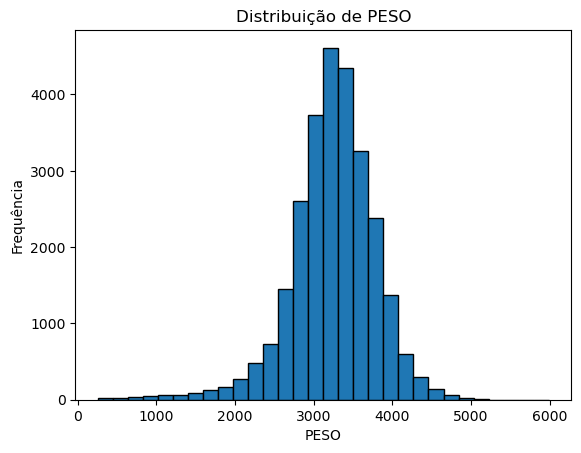

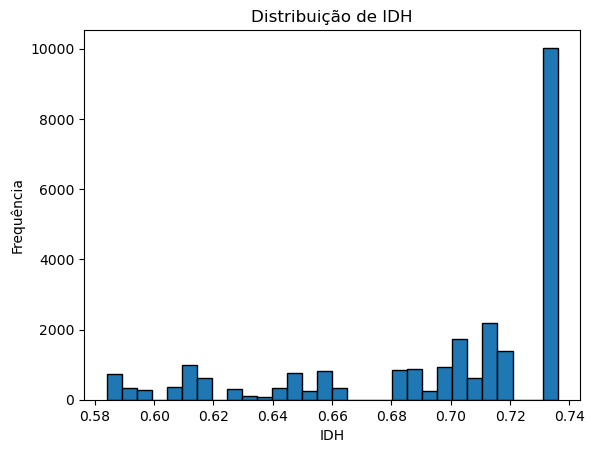

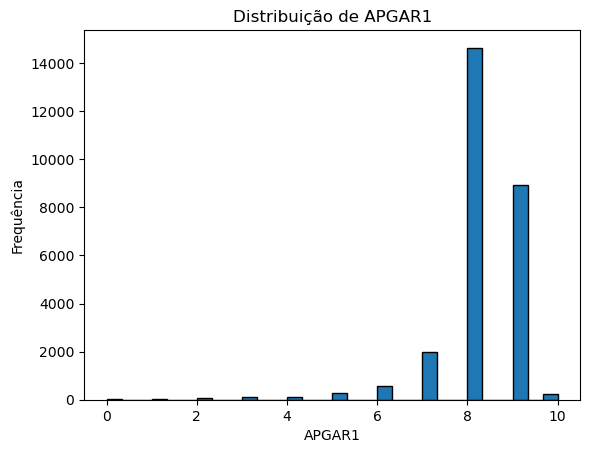

In [100]:
# Histograma para PESO
plt.hist(sinasc_raw['PESO'].dropna(), bins=30, edgecolor='k')
plt.title('Distribuição de PESO')
plt.xlabel('PESO')
plt.ylabel('Frequência')
plt.show()

# Histograma para IDH
plt.hist(sinasc_raw['IDH'].dropna(), bins=30, edgecolor='k')
plt.title('Distribuição de IDH')
plt.xlabel('IDH')
plt.ylabel('Frequência')
plt.show()

# Histograma para APGAR1
plt.hist(sinasc_raw['APGAR1'].dropna(), bins=30, edgecolor='k')
plt.title('Distribuição de APGAR1')
plt.xlabel('APGAR1')
plt.ylabel('Frequência')
plt.show()

### Distribuição do Peso dos Bebês:
A maioria dos bebês tem um peso entre 3000 e 4000 gramas, indicando que a maioria dos nascimentos é saudável. O intervalo interquartílico entre 2965 e 3575 gramas reforça essa observação.

### Distribuição do IDH:
O IDH apresenta um pico em torno de 0.74. A maioria dos valores do IDH está concentrada entre 0.6735 e 0.7360, o que pode indicar uma homogeneidade nas condições socioeconômicas das áreas analisadas.
 
### Distribuição do APGAR1:
A maioria dos índices APGAR1 está entre 8 e 10, o que sugere que a maioria dos bebês tem uma boa saúde ao nascer. O intervalo interquartílico de 8 a 9 confirma a predominância de boas pontuações APGAR1.

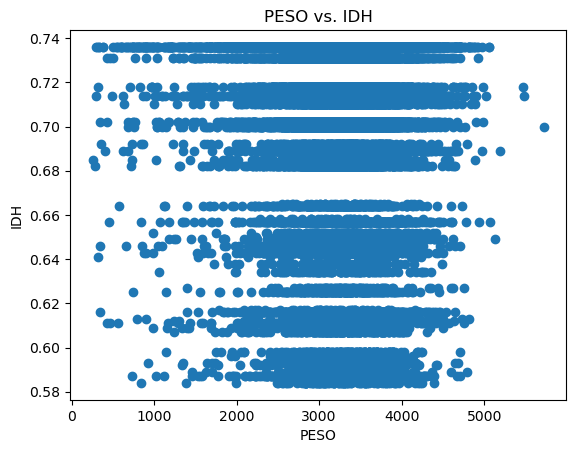

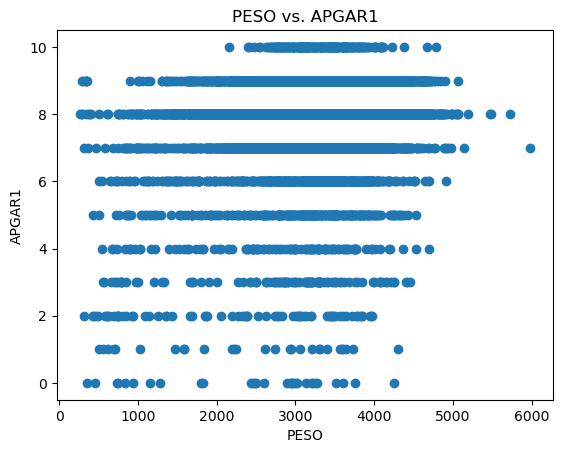

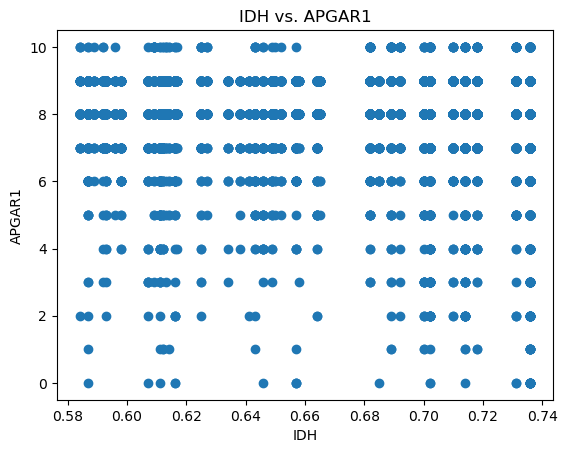

In [102]:
# Gráfico de dispersão entre PESO e IDH
plt.scatter(sinasc_raw['PESO'], sinasc_raw['IDH'])
plt.title('PESO vs. IDH')
plt.xlabel('PESO')
plt.ylabel('IDH')
plt.show()

# Gráfico de dispersão entre PESO e APGAR1
plt.scatter(sinasc_raw['PESO'], sinasc_raw['APGAR1'])
plt.title('PESO vs. APGAR1')
plt.xlabel('PESO')
plt.ylabel('APGAR1')
plt.show()

# Gráfico de dispersão entre IDH e APGAR1
plt.scatter(sinasc_raw['IDH'], sinasc_raw['APGAR1'])
plt.title('IDH vs. APGAR1')
plt.xlabel('IDH')
plt.ylabel('APGAR1')
plt.show()

### Peso e IDH: 
Não há uma relação linear significativa entre o peso dos bebês e o IDH.

### Peso e APGAR1: 
Leve tendência de que bebês com maior peso tendem a ter uma pontuação APGAR1 ligeiramente mais alta.
    
### IDH e APGAR1: 
O IDH tem uma relação muito fraca com o índice APGAR1.